_Lambda School Data Science_
# Choose appropriate visualizations

Objectives
- fix misleading visualizations
- use Seaborn to visualize distributions and relationships with continuous and discrete variables

Links
- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)
- [Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)
- [Searborn example gallery](http://seaborn.pydata.org/examples/index.html) & [tutorial](http://seaborn.pydata.org/tutorial.html)


# Upgrade Seaborn

Make sure you have at least version 0.9.0.

On Colab, go to **Restart runtime** after you run the `pip` command.

In [1]:
# !pip install --upgrade seaborn

In [2]:
import seaborn as sns
sns.__version__

'0.9.0'

# Fix misleading visualizations

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
# !wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-3-Data-Storytelling/master/module2-choose-appropriate-visualizations/misleading.py
    
import misleading

### Fix misleading plot #1

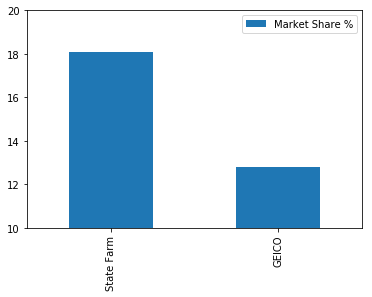

In [5]:
misleading.plot1();

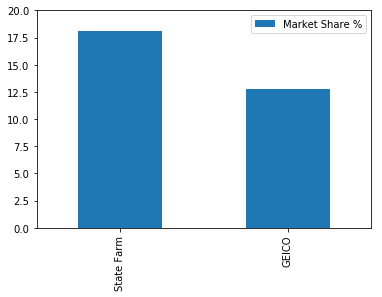

In [6]:
# Fix: Change the y-axis dimensions (start at 0 not 10)
insurance = pd.DataFrame(index=['State Farm', 'GEICO'],
                          data={'Market Share %': [18.07, 12.79]})
insurance.plot.bar(ylim=(0,20));

### Fix misleading plot #2

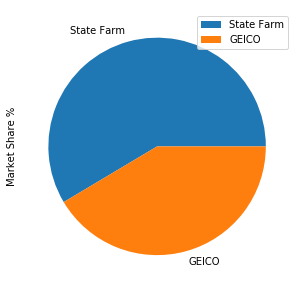

In [7]:
misleading.plot2();

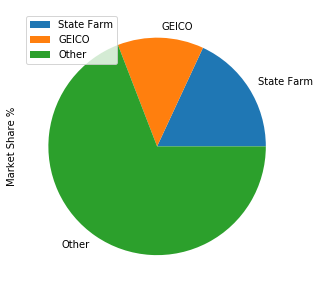

In [8]:
# Fix: Only using these two companies implies a duopoly. The viz needs at least an 'Other' category
other = pd.DataFrame(index=['Other'],
                     data={'Market Share %': [100-18.07-12.79]})
insurance = insurance.append(other)
insurance.plot.pie('Market Share %', figsize=(5,5));

## Fix misleading plot #3

_If you're on Jupyter (not Colab) then uncomment and run this cell below:_

In [9]:
import altair as alt
# Not required for JupyterLab
#alt.renderers.enable('notebook')

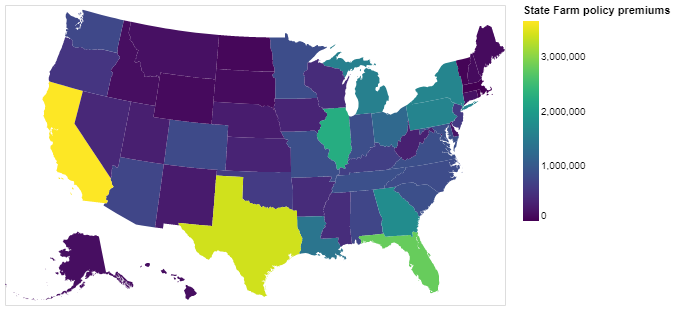

In [10]:
misleading.plot3()

In [11]:
url = 'https://raw.githubusercontent.com/LambdaSchool/DS-Sprint-02-Storytelling-With-Data/master/module2-choose-appropriate-visualizations/direct_written_premium_by_state_by_group_private_passenger_auto.csv'
df = pd.read_csv(url)

In [12]:
df.rename(columns={'STATE FARM GRP': 'State Farm policy premiums'}, inplace=True)
(df['State Farm policy premiums'] + df['BERKSHIRE HATHAWAY GRP'] == df['STATE TOTAL'])
df['State Farm market share %'] = df['State Farm policy premiums'] / df['STATE TOTAL']
df.head()

,state,id,State Farm policy premiums,BERKSHIRE HATHAWAY GRP,STATE TOTAL,State Farm market share %
0,Alabama,1,768213,282947,3025561,0.253908
1,Alaska,2,128613,81366,454623,0.282900
2,Arizona,4,760003,604049,4373055,0.173792
3,Arkansas,5,454931,96908,1777917,0.255879
4,California,6,3655463,2091720,25255501,0.144739


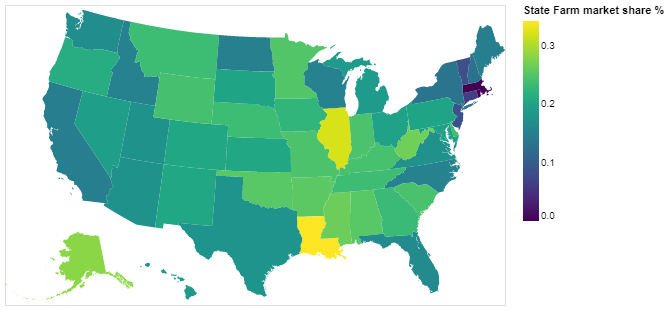

In [13]:
import altair as alt
from vega_datasets import data

states = alt.topo_feature(data.us_10m.url, 'states')
variable = 'State Farm market share %'

alt.Chart(states).mark_geoshape().encode(
    alt.Color(variable, type='quantitative')
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(df, 'id', [variable])
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
)

# Use Seaborn to visualize distributions and relationships with continuous and discrete variables

## 1. Anscombe dataset

### Load dataset

In [14]:
df = sns.load_dataset('anscombe')

### See the data's shape

In [15]:
df.shape

(44, 3)

### See the data

In [16]:
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


### [Group by](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) `'dataset'`

In [17]:
groups = df.groupby(by='dataset')

### [Describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) the groups

In [18]:
groups.describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

### Get the [count](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html), for each column in each group

In [19]:
groups.count()

,x,y
dataset,,
I,11,11
II,11,11
III,11,11
IV,11,11


### Get the [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html) ...

In [20]:
groups.mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


### Get the [standard deviation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html) ...

In [21]:
groups.std()

,x,y
dataset,,
I,3.316625,2.031568
II,3.316625,2.031657
III,3.316625,2.030424
IV,3.316625,2.030579


### Get the [correlation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) ...

In [22]:
groups.corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

### Use pandas to [plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) the groups, as scatter plots

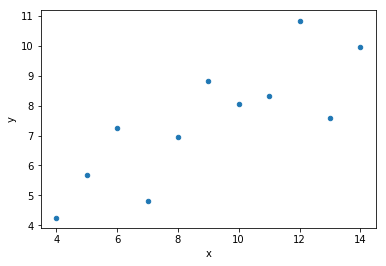

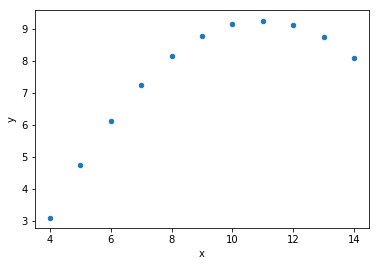

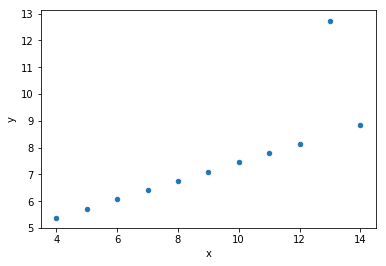

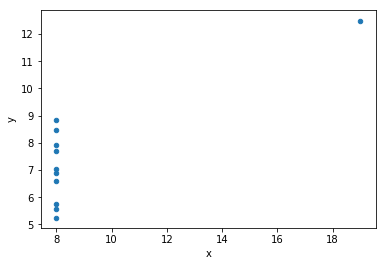

In [23]:
groups.plot('x', 'y', kind='scatter');

### Use Seaborn to make [relational plots](http://seaborn.pydata.org/generated/seaborn.relplot.html)

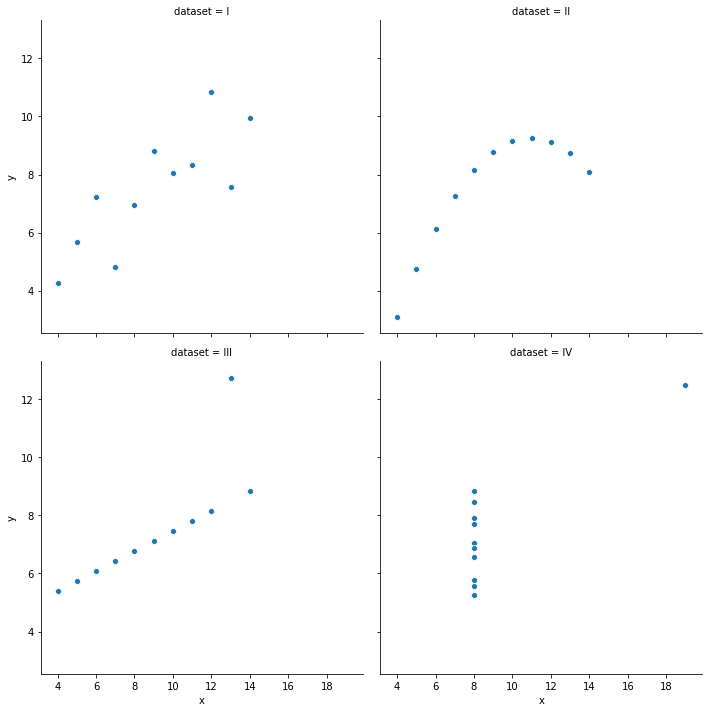

In [24]:
sns.relplot('x', 'y', col='dataset', data=df, col_wrap=2);

### Use Seaborn to make [linear model plots](http://seaborn.pydata.org/generated/seaborn.lmplot.html)

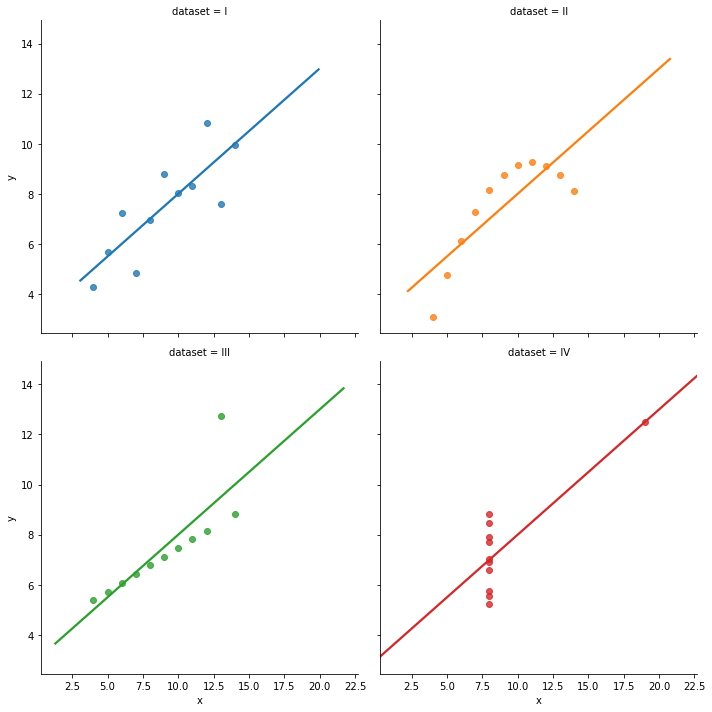

In [25]:
sns.lmplot('x', 'y', col='dataset', hue='dataset', data=df, col_wrap=2, ci=None);

#### Links
- [Seaborn examples: Anscombe's quartet](http://seaborn.pydata.org/examples/anscombes_quartet.html)
- [Wikipedia: Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
- [The Datasaurus Dozen](https://www.autodeskresearch.com/publications/samestats)

## 2. Tips dataset

### Load dataset

In [26]:
tips = sns.load_dataset('tips')

### See the data's shape

In [27]:
tips.shape

(244, 7)

### See the first 5 rows

In [28]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [29]:
# Make 'smoker' a Boolean dtype
tips['smoker'] = tips['smoker'].replace({'No':0, 'Yes':1})

### Describe the data

In [30]:
tips.describe()

,total_bill,tip,smoker,size
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.381148,2.569672
std,8.902412,1.383638,0.486667,0.951100
min,3.070000,1.000000,0.000000,1.000000
25%,13.347500,2.000000,0.000000,2.000000
50%,17.795000,2.900000,0.000000,2.000000
75%,24.127500,3.562500,1.000000,3.000000
max,50.810000,10.000000,1.000000,6.000000


### Make univariate [distribution plots](https://seaborn.pydata.org/generated/seaborn.distplot.html)

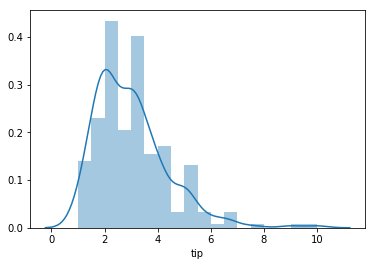

In [31]:
sns.distplot(tips.tip);

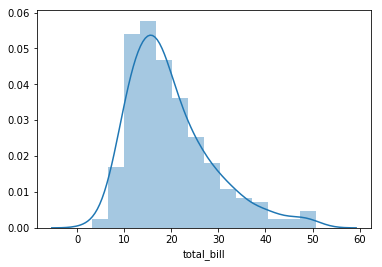

In [32]:
sns.distplot(tips.total_bill);

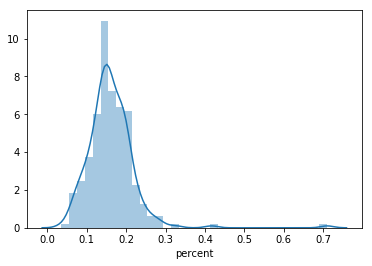

In [33]:
tips['percent'] = tips.tip / tips.total_bill
sns.distplot(tips.percent);

In [34]:
tips['percent'].value_counts(bins=20).sort_index()

(0.034, 0.0694]     6
(0.0694, 0.103]    25
(0.103, 0.137]     42
(0.137, 0.171]     78
(0.171, 0.204]     60
(0.204, 0.238]     20
(0.238, 0.272]      7
(0.272, 0.306]      3
(0.306, 0.339]      1
(0.339, 0.373]      0
(0.373, 0.407]      0
(0.407, 0.44]       1
(0.44, 0.474]       0
(0.474, 0.508]      0
(0.508, 0.542]      0
(0.542, 0.575]      0
(0.575, 0.609]      0
(0.609, 0.643]      0
(0.643, 0.677]      0
(0.677, 0.71]       1
Name: percent, dtype: int64

### Make bivariate [relational plots](https://seaborn.pydata.org/generated/seaborn.relplot.html)

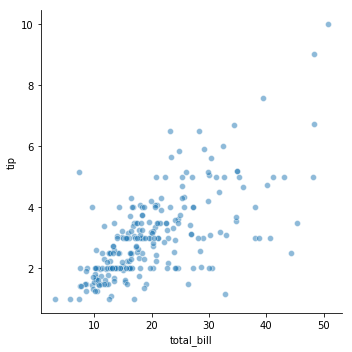

In [35]:
sns.relplot('total_bill', 'tip', data=tips, alpha=0.5);

### Make univariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

In [36]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

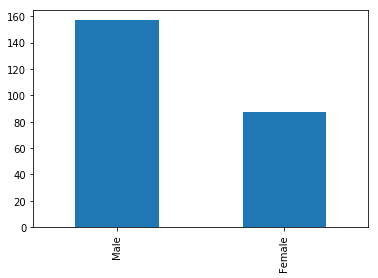

In [37]:
tips.sex.value_counts().plot.bar();

### Make bivariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

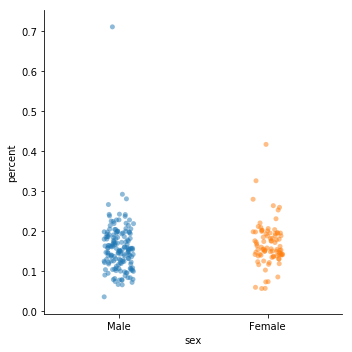

In [38]:
sns.catplot('sex', 'percent', data=tips, kind='strip', alpha=0.5);

## 3. Flights

### Load dataset

In [39]:
flights = sns.load_dataset('flights')

### See the data's shape

In [40]:
flights.shape

(144, 3)

### See the first 5 rows

In [41]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


### Describe the data

In [42]:
flights.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


### Plot year & passengers

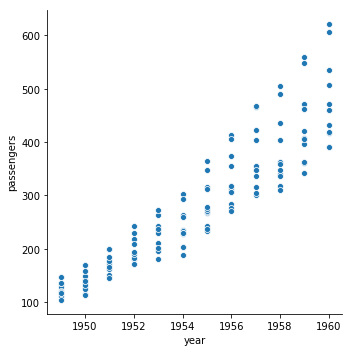

In [43]:
sns.relplot('year', 'passengers', data=flights);

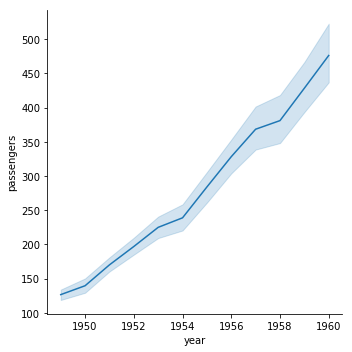

In [44]:
sns.relplot('year', 'passengers', data=flights, kind='line', ci=95);

### Plot month & passengers

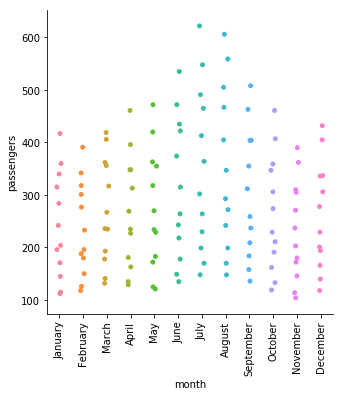

In [45]:
sns.catplot('month', 'passengers', data=flights);
plt.xticks(rotation=90);

### Create a [pivot table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html) of passengers by month and year

In [46]:
table = flights.pivot_table('passengers', 'month', 'year')
table

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


### Plot the pivot table as a [heat map](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

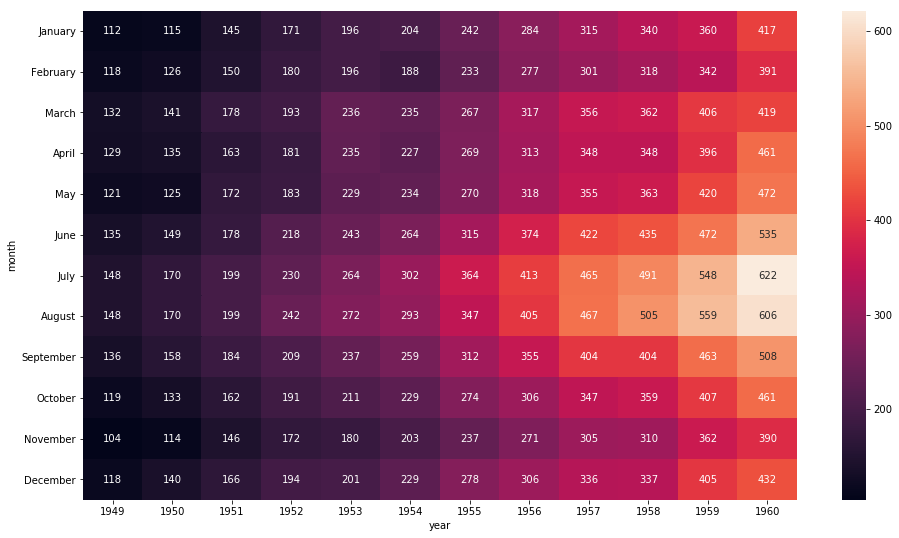

In [47]:
plt.figure(figsize=(16,9))
sns.heatmap(table, annot=True, fmt='d');

# ASSIGNMENT

### 1.

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

### 2.

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [48]:
# Faceted radar chart
# import pandas as pd
import matplotlib.pyplot as plt
from math import pi

In [49]:
# Retrieve dataset
pokemon = pd.read_csv('https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv')

In [50]:
pokemon.head(20)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [51]:
# Filter pokemon for the radar graph
starters = pokemon.iloc[[0, 4, 9]]
starter_evolutions = pokemon.iloc[[2, 6, 11]]

In [52]:
# Filter columns for graphable features
starters_radar = starters.loc[:, 'HP':'Speed'].head()
starters_radar = starters_radar.rename(index={0:'Bulbasaur', 4:'Charmander', 9:'Squirtle'})
starters_radar = starters_radar.reset_index()
starters_radar = starters_radar.rename(columns={'index':'Name'})
starters_radar.head()

,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,45,49,49,65,65,45
1,Charmander,39,52,43,60,50,65
2,Squirtle,44,48,65,50,64,43


In [53]:
evolutions_radar = starter_evolutions.loc[:, 'HP':'Speed'].head()
evolutions_radar = evolutions_radar.rename(index={2:'Venusaur', 6:'Charizard', 11:'Blastoise'})
evolutions_radar = evolutions_radar.reset_index()
evolutions_radar = evolutions_radar.rename(columns={'index':'Name'})
evolutions_radar.head()

,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Venusaur,80,82,83,100,100,80
1,Charizard,78,84,78,109,85,100
2,Blastoise,79,83,100,85,105,78


In [54]:
pokemon_radar = pd.concat([starters_radar, evolutions_radar])
pokemon_radar.reset_index()
pokemon_radar.index = [0,1,2,3,4,5]
pokemon_radar

,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,45,49,49,65,65,45
1,Charmander,39,52,43,60,50,65
2,Squirtle,44,48,65,50,64,43
3,Venusaur,80,82,83,100,100,80
4,Charizard,78,84,78,109,85,100
5,Blastoise,79,83,100,85,105,78


In [55]:
def make_spider(data, row, color):
    # number of variables
    categories = list(data)[1:]
    N = len(categories)
    
    # Axis angle calculation
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # Initialize radar plot
    ax = plt.subplot(3, 3, row+1, polar=True, )
    
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    # Draw one axis per variable and add labels
    plt.xticks(angles[:-1], categories, color='blue', size=10)
    
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([40,80,120], ['40', '80'], color='blue', size=8)
    plt.ylim(0,120)
    
    # Ind1
    values=data.loc[row].drop('Name').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
    
    # Add a title
    plt.title(label=data['Name'][row], size=14, color=color, y=1.1)
    
    # PART 2: Apply to all individuals
    # Initialize the figure
    #plt.figure(figsize=(12,12))
    plt.tight_layout(rect=(0,0,3,3))

    # Create color palette
    my_palette = plt.cm.get_cmap("Set2", len(data.index))

In [56]:
import random

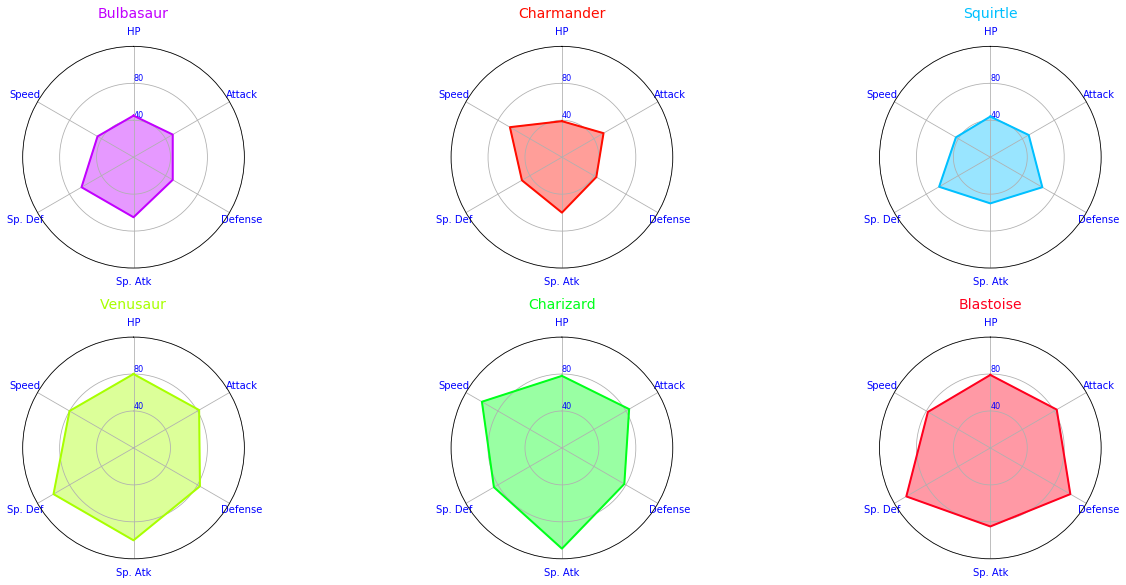

In [68]:
# Create array of colors from given colormap
num_colors = 100
cm = plt.cm.get_cmap('gist_rainbow')
map_colors = []
for i in range(num_colors):
    map_colors.append(cm(1.*i/num_colors))

# Loop to plot, get random color value from map_colors
for row in range(0, len(pokemon_radar.index)):
    make_spider(data=pokemon_radar, row=row, color=random.choice(map_colors))